In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


-19.44076224625603 -169.38671736576944
-24.55638698129036 111.16250913879844
-0.004300897215912869 173.4825961493491
80.22290280734734 48.92626973103117
-7.544478154339771 -23.3908458121349
64.01270528214613 -150.52812265948836
-56.57314025698376 -102.15006577951462
-49.224986812797034 -54.249865134215185
-21.926266425298223 22.13098193122758
87.30867629910125 21.506791967804645
84.49607543893455 -110.96832238852807
80.97055052284432 -79.70035861119125
-61.818564241818855 161.06582394661098
-61.16587552354213 102.61475380942761
-47.40436742470384 102.83620686927912
-63.551250452163195 9.315944232416967
-34.5237299988462 -109.5015482022931
47.38951302274023 56.231560665465224
17.68306915105252 128.83638787090746
80.37005084350986 -43.343049475483355
-31.66424110523146 175.30177326796843
-85.87162992801213 77.74590967767199
10.682469200868042 71.58492329119807
61.13548864128441 -137.42738968452412
69.07551986811606 -156.71602144726538
40.458772465091215 139.56358593977734
-66.05075962957

-61.039093954335186 -18.979336456599242
55.334484410203004 -100.9565609245121
-80.31647513383828 -54.717998273648135
-24.196755924795 76.72352111491404
-37.5586197424806 171.98656838403963
44.2858694622808 -18.636009931152273
70.11568616514054 139.28228196326575
-5.374170008614016 133.3378651629573
67.99043270632367 -130.5906969839869
-37.7416501814016 -158.25132395243085
68.48076672004666 -132.28523122694278
-60.710344186673225 -64.91382516694321
-72.61117098695738 -132.48066255378626
17.903741438094215 7.407868382101782
70.78634489868983 -115.2181364792775
-12.131595136432196 -140.76780368118347
23.150073023639933 127.43339893034425
-82.85335634783254 159.88592257173286
16.849505088329195 59.25660554336645
3.903999337313948 -67.37985170178794
-10.897987386069246 -50.68579005151767
-64.07458303458002 -5.64543698151698
-7.9300585870795 115.99985893023643
19.345073080028627 -27.102235640010406
74.58087420441527 -80.00261680711168
-18.021828434953477 -103.51463877568055
5.861910946748026

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38dcbca4e18440eb988aff406f53a3fa


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "city"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38dcbca4e18440eb988aff406f53a3fa&q=city


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "city"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': 149.1292, 'lat': -35.2813},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 34.9,
  'feels_like': 34.9,
  'temp_min': 33.01,
  'temp_max': 36,
  'pressure': 1020,
  'humidity': 91},
 'visibility': 10000,
 'wind': {'speed': 0.54, 'deg': 293, 'gust': 3},
 'clouds': {'all': 0},
 'dt': 1618176611,
 'sys': {'type': 3,
  'id': 2004200,
  'country': 'AU',
  'sunrise': 1618172675,
  'sunset': 1618213420},
 'timezone': 36000,
 'id': 2172517,
 'name': 'City',
 'cod': 200}

In [11]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":149.1292,"lat":-35.2813},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":34.9,"feels_like":34.9,"temp_min":33.01,"temp_max":36,"pressure":1020,"humidity":91},"visibility":10000,"wind":{"speed":0.54,"deg":293,"gust":3},"clouds":{"all":0},"dt":1618176611,"sys":{"type":3,"id":2004200,"country":"AU","sunrise":1618172675,"sunset":1618213420},"timezone":36000,"id":2172517,"name":"City","cod":200}'

In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alofi
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | wasilla
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | necochea
Processing Record 9 of Set 1 | dekar
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | shubarshi
Processing Record 19 of Set 1 | payo
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | kaeo
Processing Record 22 of Set 1 | 

Processing Record 36 of Set 4 | turan
Processing Record 37 of Set 4 | galesong
Processing Record 38 of Set 4 | sonoita
Processing Record 39 of Set 4 | turukhansk
Processing Record 40 of Set 4 | arlit
Processing Record 41 of Set 4 | namatanai
Processing Record 42 of Set 4 | pitimbu
Processing Record 43 of Set 4 | isangel
Processing Record 44 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 4 | hofn
Processing Record 46 of Set 4 | walvis bay
Processing Record 47 of Set 4 | leningradskiy
Processing Record 48 of Set 4 | tarudant
City not found. Skipping...
Processing Record 49 of Set 4 | kruisfontein
Processing Record 50 of Set 4 | sao filipe
Processing Record 1 of Set 5 | dunda
Processing Record 2 of Set 5 | marystown
Processing Record 3 of Set 5 | saint-francois
Processing Record 4 of Set 5 | kavieng
Processing Record 5 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 5 | san patricio
Processing Record 7 of Set 5 | so

Processing Record 21 of Set 8 | lalibela
Processing Record 22 of Set 8 | aguadilla
Processing Record 23 of Set 8 | vilkija
Processing Record 24 of Set 8 | mitsamiouli
Processing Record 25 of Set 8 | yantal
Processing Record 26 of Set 8 | eskasem
City not found. Skipping...
Processing Record 27 of Set 8 | severo-kurilsk
Processing Record 28 of Set 8 | ballina
Processing Record 29 of Set 8 | senneterre
Processing Record 30 of Set 8 | vestmannaeyjar
Processing Record 31 of Set 8 | guarapari
Processing Record 32 of Set 8 | alvik
Processing Record 33 of Set 8 | samarai
Processing Record 34 of Set 8 | koulikoro
Processing Record 35 of Set 8 | erenhot
Processing Record 36 of Set 8 | noumea
Processing Record 37 of Set 8 | qeshm
Processing Record 38 of Set 8 | lasa
Processing Record 39 of Set 8 | mackenzie
Processing Record 40 of Set 8 | ingham
Processing Record 41 of Set 8 | pianco
Processing Record 42 of Set 8 | acarau
Processing Record 43 of Set 8 | bossembele
City not found. Skipping...
Pro

Processing Record 8 of Set 12 | sibolga
Processing Record 9 of Set 12 | dreux
Processing Record 10 of Set 12 | svetlogorsk
Processing Record 11 of Set 12 | newport
Processing Record 12 of Set 12 | kikwit
Processing Record 13 of Set 12 | seidu
Processing Record 14 of Set 12 | terrace
Processing Record 15 of Set 12 | nisia floresta
Processing Record 16 of Set 12 | pishin
Processing Record 17 of Set 12 | mae hong son
Processing Record 18 of Set 12 | jamay
Processing Record 19 of Set 12 | hualmay
Processing Record 20 of Set 12 | portland
Processing Record 21 of Set 12 | awjilah
Processing Record 22 of Set 12 | buraydah
Processing Record 23 of Set 12 | santa isabel
Processing Record 24 of Set 12 | allapalli
Processing Record 25 of Set 12 | cockburn town
Processing Record 26 of Set 12 | kalakamati
Processing Record 27 of Set 12 | samaipata
Processing Record 28 of Set 12 | shirokiy
Processing Record 29 of Set 12 | pochutla
Processing Record 30 of Set 12 | byron bay
Processing Record 31 of Set

In [14]:
len(city_data)

548

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alofi,-19.0595,-169.9187,77.00,88,38,5.75,NU,2021-04-11 21:33:48
1,Carnarvon,-24.8667,113.6333,78.80,89,40,13.80,AU,2021-04-11 21:33:49
2,Georgetown,5.4112,100.3354,81.00,94,40,3.44,MY,2021-04-11 21:29:49
3,Wasilla,61.5814,-149.4394,28.99,40,90,8.05,US,2021-04-11 21:33:49
4,Punta Arenas,-53.1500,-70.9167,57.20,38,0,10.36,CL,2021-04-11 21:32:26
5,Necochea,-38.5473,-58.7368,64.99,75,0,7.00,AR,2021-04-11 21:33:50
6,Dekar,-21.5333,21.9333,67.06,34,0,5.39,BW,2021-04-11 21:33:50
7,Longyearbyen,78.2186,15.6401,19.40,63,40,13.80,SJ,2021-04-11 21:33:50
8,Yellowknife,62.4560,-114.3525,10.00,66,90,5.75,CA,2021-04-11 21:30:11
9,Qaanaaq,77.4840,-69.3632,23.13,93,100,11.88,GL,2021-04-11 21:33:50


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df= city_data_df[new_column_order]

In [17]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alofi,NU,2021-04-11 21:33:48,-19.0595,-169.9187,77.00,88,38,5.75
1,Carnarvon,AU,2021-04-11 21:33:49,-24.8667,113.6333,78.80,89,40,13.80
2,Georgetown,MY,2021-04-11 21:29:49,5.4112,100.3354,81.00,94,40,3.44
3,Wasilla,US,2021-04-11 21:33:49,61.5814,-149.4394,28.99,40,90,8.05
4,Punta Arenas,CL,2021-04-11 21:32:26,-53.1500,-70.9167,57.20,38,0,10.36
5,Necochea,AR,2021-04-11 21:33:50,-38.5473,-58.7368,64.99,75,0,7.00
6,Dekar,BW,2021-04-11 21:33:50,-21.5333,21.9333,67.06,34,0,5.39
7,Longyearbyen,SJ,2021-04-11 21:33:50,78.2186,15.6401,19.40,63,40,13.80
8,Yellowknife,CA,2021-04-11 21:30:11,62.4560,-114.3525,10.00,66,90,5.75
9,Qaanaaq,GL,2021-04-11 21:33:50,77.4840,-69.3632,23.13,93,100,11.88


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

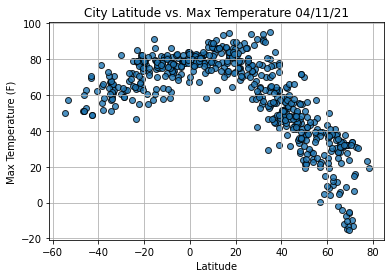

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

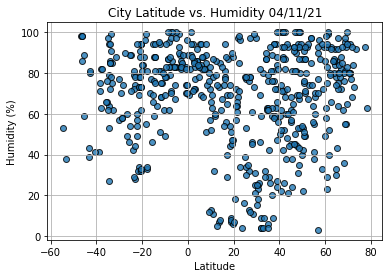

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

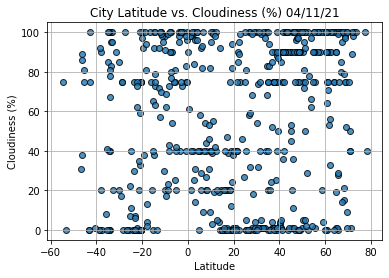

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

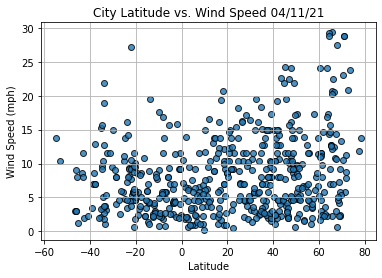

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [41]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                     Hermanus
Country                        ZA
Date          2021-04-11 21:33:51
Lat                      -34.4187
Lng                       19.2345
Max Temp                       66
Humidity                       79
Cloudiness                    100
Wind Speed                   5.01
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
543     True
544     True
545     True
546     True
547    False
Name: Lat, Length: 548, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Georgetown,MY,2021-04-11 21:29:49,5.4112,100.3354,81.00,94,40,3.44
3,Wasilla,US,2021-04-11 21:33:49,61.5814,-149.4394,28.99,40,90,8.05
7,Longyearbyen,SJ,2021-04-11 21:33:50,78.2186,15.6401,19.40,63,40,13.80
8,Yellowknife,CA,2021-04-11 21:30:11,62.4560,-114.3525,10.00,66,90,5.75
9,Qaanaaq,GL,2021-04-11 21:33:50,77.4840,-69.3632,23.13,93,100,11.88
...,...,...,...,...,...,...,...,...,...
541,Tabou,CI,2021-04-11 21:36:10,4.4230,-7.3528,80.73,84,40,7.54
543,Lao Cai,VN,2021-04-11 21:36:11,22.4833,103.9500,70.86,98,89,0.43
544,Sidi Ali,DZ,2021-04-11 21:36:11,36.0998,0.4206,56.17,81,24,2.64
545,Tsuruoka,JP,2021-04-11 21:34:24,38.7217,139.8217,48.56,66,1,6.89


In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Georgetown,MY,2021-04-11 21:29:49,5.4112,100.3354,81.00,94,40,3.44
3,Wasilla,US,2021-04-11 21:33:49,61.5814,-149.4394,28.99,40,90,8.05
7,Longyearbyen,SJ,2021-04-11 21:33:50,78.2186,15.6401,19.40,63,40,13.80
8,Yellowknife,CA,2021-04-11 21:30:11,62.4560,-114.3525,10.00,66,90,5.75
9,Qaanaaq,GL,2021-04-11 21:33:50,77.4840,-69.3632,23.13,93,100,11.88


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

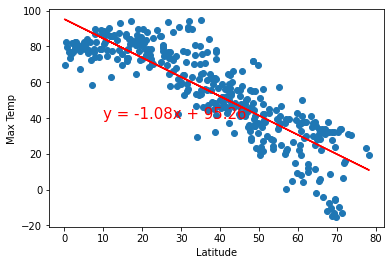

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


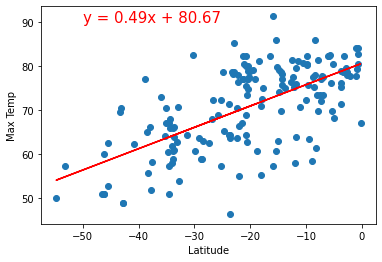

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


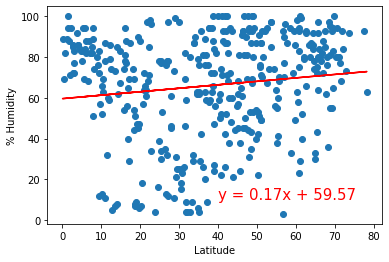

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

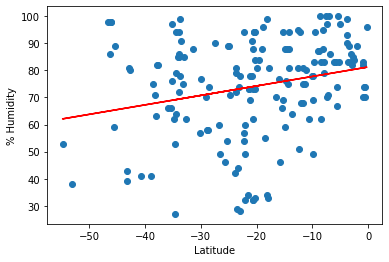

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

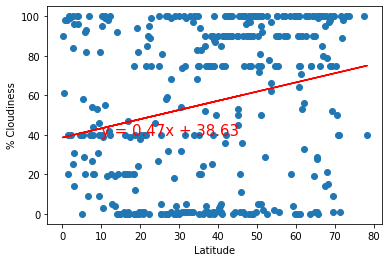

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10, 40))

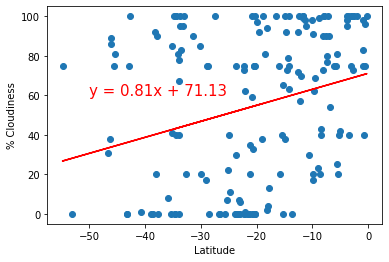

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

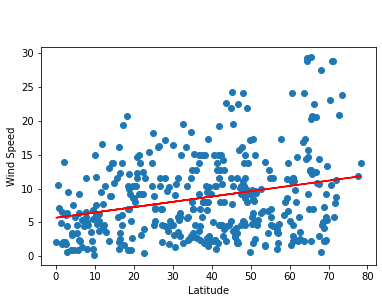

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

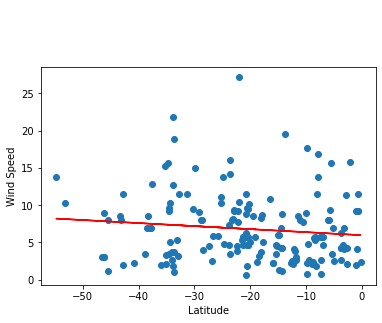

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))